# Python pro fyziky

<img src="machine_learning.png" width=350>

# Úvod do strojového účení

## Co je strojové učení?

# Star vs Quasar

Zkusíme náš počítač naučit jak rozlišovat mezi kvazarem a hvězdou. Napíšeme si vlastní Machine Learningový algoritmus - nebo něco na ten způsob. 

<br>

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" align=left width=400> 
<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" align=right width=400>

## SDSS

= Sloan Digital Sky Survey

- hvězdy naší Galaxie


- galaxie do $z \approx 0.7$


- kvazary do $z \approx 6$


- spektroskopie 6 mil. objektů


- fotometrie 1 bil. objektů


- systém filtrů `u g r i z`

<img src="https://www.astroml.org/_images/fig_sdss_filters_1.png" align=left width=500>

Spektrum hvězd a kvazarů se často podstatně liší. Zatímco u hvězd v naprosté většině pozorujeme hlavně absorpční čáry, u kvazarů můžeme vidět často velmi silné a silně rozšířené emisní čáry. I celkový tvar spektra se velmi liší - zatímco u hvězd docela dobře připomíná záření absolutně černého tělesa, jen s čarami a možná nějakým balmerovým skokem, u kvazarů často vidíme přebytek emise a to hlavně v ultrafialové části spektra.

Při pohledu na jednotlivá spektra bychom tyto dva objekty od sebe tedy velmi jednoduše rozeznali - avšak spektroskopie je velmi drahá a náročná - a například přehlídka SDSS pozoruje i hvězdy o hvězdných velikostech bližících se 20. magnitudě. Na největším dalekohledu v České republice, který je v Ondřejově, lze pozorovat spektra do asi 12. magnitudy.

Budeme si tedy muset vystačit s výřezy z těchto spekter v podobě barevný filtrů. Přehlídka SDSS využívá systém UGRIZ, měří tedy od blízké UV do blízké IR a tuto oblast rozdělí do 5 filtrů (U G R I Z).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Úkol 1: Načtěte data ze souboru sdss_photo.csv

In [7]:
data = pd.read_csv("sdss_photo.csv")

In [8]:
data

,u,g,r,i,z,target
0,19.240999,17.525999,16.840000,16.613001,16.492001,star
1,19.732000,18.339001,17.767000,17.580000,17.481001,star
2,16.120001,15.232000,14.933000,14.845000,14.827000,star
3,18.995001,18.150999,17.877001,17.747000,17.766001,star
4,19.032000,18.112000,17.848000,17.709999,17.712000,star
...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO


#### Úkol 2: Rozdělte data na dvě skupiny (star x QSO) a vizuálně je srovnejte (histogram, dvojice parametrů,..)

In [10]:
filters = ["u", "g", "r", "i", "z"]

#QSOs, stars = [], []
#for i in range(len(data.target)):
#    if data.target[i] == "star":
#        stars.append(data[filters].loc[i])
    
#    elif data.target[i] == "QSO":
#        QSOs.append(data[filters].loc[i])
        
#QSOs = pd.DataFrame(data=QSOs, columns=filters)
#stars = pd.DataFrame(data=stars, columns=filters)

In [11]:
QSOs = data[filters][data.target == "QSO"]
stars = data[filters][data.target == "star"]

Můžeme si to představit jako 5-dimenzionální prostor. Každý bod v takovém prostoru je tedy popsán 5 parametry - filtry U,G,R,I,Z.

Zkusíme si to nějak vizualizovat.

Text(0.5, 0, 'U [mag]')

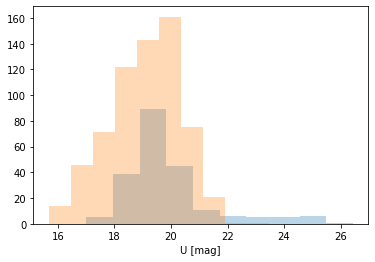

In [12]:
plt.hist(QSOs.u, alpha=0.3)
plt.hist(stars.u, alpha=0.3)
plt.xlabel("U [mag]")

Kvazary můžeme ve filtru U pozorovat skoro až do 26. magnitudy, zatímco u hvězd končíme na přibližně 22. magnitudě.

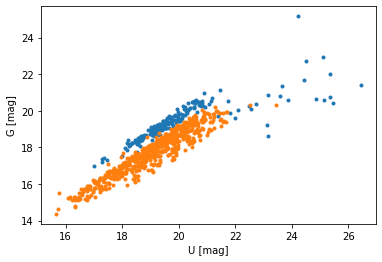

In [13]:
plt.plot(QSOs.u, QSOs.g, ".")
plt.plot(stars.u, stars.g, ".")
plt.xlabel("U [mag]")
plt.ylabel("G [mag]");

Při dané hvězdné velikosti ve filtru U, mají kvazary přibližně o půl až magnitudu nižší hvězdnou velikost ve filtru G, což značí o přebytku v UV oblasti spektra.

In [14]:
%matplotlib qt
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.scatter3D(QSOs.u, QSOs.g, QSOs.r)
ax.scatter3D(stars.u, stars.g, stars.r)

ax.set_xlabel("u")
ax.set_ylabel("g")
ax.set_zlabel("r")

libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


Text(0.5, 0, 'r')

In [15]:
%matplotlib inline

Podíváme se tedy na histogramy všech filtrů a všechny možné dvojkombinace filtrů.

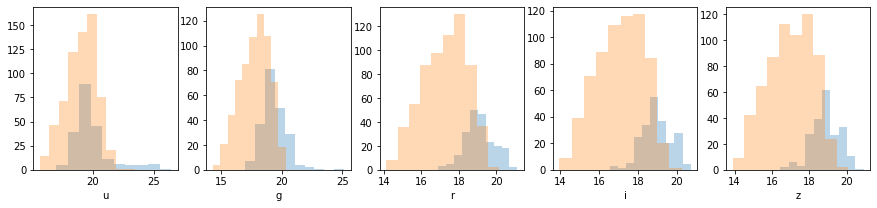

In [16]:
plt.figure(figsize=(15,3))
for i,f in enumerate(filters):
    plt.subplot(1,5,i+1)
    plt.hist(QSOs[f], alpha=0.3)
    plt.hist(stars[f], alpha=0.3)
    plt.xlabel(f)

$ K(k,n) = \frac{n!}{k! \, (k-n)!} $

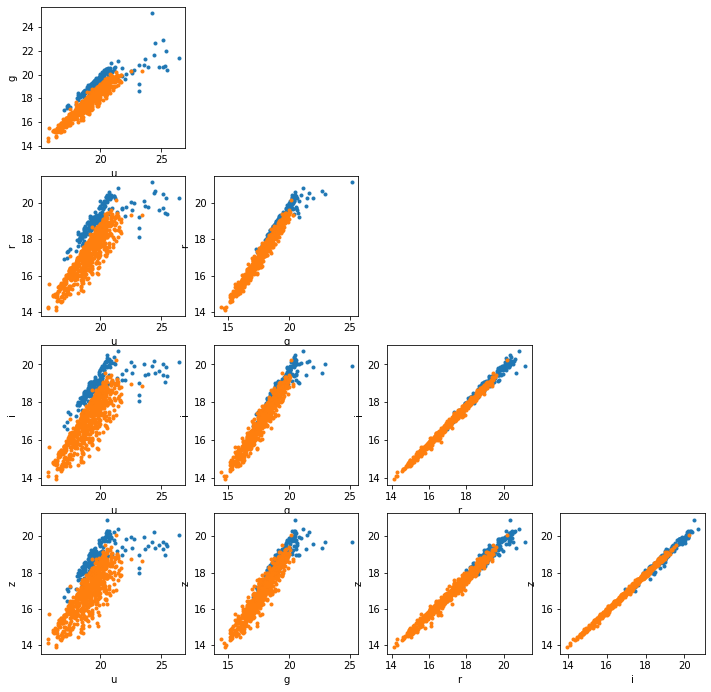

In [17]:
plt.figure(figsize=(15,15))

x = 0
for i in range(5):
    for j in range(5):
        x += 1
        if i == j: continue
        elif i < j: continue
        
        f1 = filters[i]
        f2 = filters[j]
        
        plt.subplot(5,5,x)
        
        plt.plot(QSOs[f2], QSOs[f1], ".")
        plt.plot(stars[f2], stars[f1], ".")
        plt.xlabel(f2)
        plt.ylabel(f1)

Naším úkolem bude pokusit se najít nějaké obecné pravidlo, podle kterého můžeme, na základě znalosti magnitud v těchto filtrech, jednoduše rozhodnout zda se jedná o hvězdy nebo o kvazi-stelární objekt.

K dispozici teď máme vlastně tuto sadu dat, u nichž to rozdělení známe - víme co je hvězda a co je QSO. A potřebujeme tu podmínku napsat tak obecně, aby, až naměříme nějaký nový objekt a nebudeme si jistí jestli je to hvězda nebo quasar, tak jsme to na základně naší podmínky schopni to jednoduše určit.

#### Úkol 3: Vyberte filtr / kombinaci filtrů s nejlépe rozlišenými třídami a vytvořte podmínky pro jejich rozdělení

například:

`r > 19.5` &rarr; QSO

`z < 17.5` &rarr; star

<br>

```python
guess = []
for i in range(len(data.u)):
    if data.r[i] > 19.5:
        guess.append("QSO")
    else:
        guess.append("star")
```

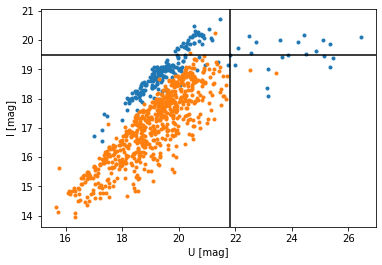

In [22]:
plt.plot(QSOs.u, QSOs.i, ".")
plt.plot(stars.u, stars.i, ".")
plt.xlabel("U [mag]")
plt.ylabel("I [mag]");

plt.axhline(19.5, color="black")
plt.axvline(21.8, color="black")

In [23]:
guess = []
for i in range(len(data.u)):
    if data.i[i] > 19.5 or data.u[i] > 21.8:
        guess.append("QSO")
    else:
        guess.append("star")

#### Úkol 4: Určete kolik hvězd a kvazarů jste určili správně

hint: porovnejte proměnnou `guess` se sloupcem `data["target"]`

In [24]:
N = len(data.target)
correct = sum((guess == data.target).astype(int))

N, correct, correct / N * 100

(867, 710, 81.89158016147636)

Takže nám to ukazuje, že máme přibližně 82% úspěšnost, to není tak špatné že? 

No vzhledem k tomu, že nemáme 50% hvězd a 50% kvazarů, tak to vlastně není nic moc. Jelikož 75% našeho samplu tvoří hvězdy, tak kdybychom o všem řekli, že je to hvězda, tak budeme mít úspěšnost 75%. Takže správně bychom určili vlastně asi jen 1/3 kvazarů. My ale chceme hledat kvazary.

In [56]:
len(QSOs.u), len(stars.u)

(212, 655)

In [60]:
len(stars.u) / N * 100

75.54786620530565

In [26]:
N = len(data.target)
correct = sum((guess == data.target).astype(int))

N, correct, correct / N * 100

(867, 710, 81.89158016147636)

In [34]:
correct_QSO = sum(((guess == data.target) & (data.target == "QSO")).astype(int))
len(QSOs.u), correct_QSO, correct_QSO / len(QSOs.u) * 100

(212, 59, 27.830188679245282)

In [35]:
correct_star = sum(((guess == data.target) & (data.target == "star")).astype(int))
len(stars.u), correct_star, correct_star / len(stars.u) * 100

(655, 651, 99.38931297709924)

Zkusíme přidat další podmínku.

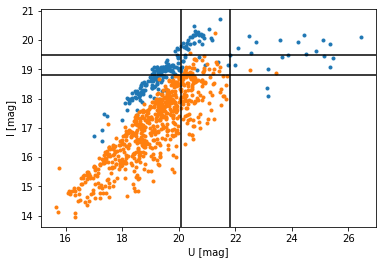

In [36]:
plt.plot(QSOs.u, QSOs.i, ".")
plt.plot(stars.u, stars.i, ".")
plt.xlabel("U [mag]")
plt.ylabel("I [mag]");

plt.axhline(19.5, color="black")
plt.axvline(21.8, color="black")

plt.axhline(18.8, color="black")
plt.axvline(20.1, color="black")

In [37]:
guess = []
for u, i, t in zip(data.u, data.i, data.target):
    if i > 19.5 or u > 21.8:
        guess.append("QSO")
    elif i > 18.8 and u < 20.1:
        guess.append("QSO")
    else:
        guess.append("star")

In [38]:
N = len(data.target)
correct = sum((guess == data.target).astype(int))

N, correct, correct / N * 100

(867, 771, 88.92733564013841)

In [39]:
correct_QSO = sum(((guess == data.target) & (data.target == "QSO")).astype(int))
len(QSOs.u), correct_QSO, correct_QSO / len(QSOs.u) * 100

(212, 120, 56.60377358490566)

No tak už je to o něco lepší, ale tohle asi nebude ta správná cesta, to bysme se upodmínkovali.

## A co barevné indexy?

#### Úkol 5: Vytvořte barevné indexy ze sousedních filtrů a plotněte je do grafu

In [41]:
QSOs["u-g"] = QSOs.u - QSOs.g
QSOs["g-r"] = QSOs.g - QSOs.r
QSOs["r-i"] = QSOs.r - QSOs.i
QSOs["i-z"] = QSOs.i - QSOs.z

stars["u-g"] = stars.u - stars.g
stars["g-r"] = stars.g - stars.r
stars["r-i"] = stars.r - stars.i
stars["i-z"] = stars.i - stars.z

In [42]:
QSOs

,u,g,r,i,z,u-g,g-r,r-i,i-z
655,20.242001,20.205999,19.941000,19.485001,19.177999,0.036001,0.264999,0.455999,0.307001
656,17.274000,17.372000,17.285000,16.929001,17.108999,-0.098000,0.087000,0.355999,-0.179998
657,23.659000,21.349001,19.834999,19.419001,19.308001,2.309999,1.514002,0.415998,0.111000
658,19.945999,20.077999,20.096001,19.728001,19.586000,-0.132000,-0.018002,0.368000,0.142000
659,19.006001,19.087999,18.951000,18.594999,18.431000,-0.081999,0.136999,0.356001,0.164000
...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,0.199999,0.384001,0.035999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,5.004000,1.168001,0.153000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,0.335999,-0.092999,0.382999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,0.044001,0.313000,0.041000,0.039000


In [43]:
stars

,u,g,r,i,z,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,0.920000,0.264000,0.138000,-0.002001
...,...,...,...,...,...,...,...,...,...
650,20.257999,18.625000,17.923000,17.673000,17.523001,1.632999,0.702000,0.250000,0.150000
651,19.906000,18.627001,18.009001,17.780001,17.649000,1.278999,0.618000,0.229000,0.131001
652,19.400000,18.301001,17.840000,17.670000,17.629999,1.098999,0.461000,0.170000,0.040001
653,20.471001,19.514999,19.216000,19.066000,19.104000,0.956001,0.299000,0.150000,-0.038000


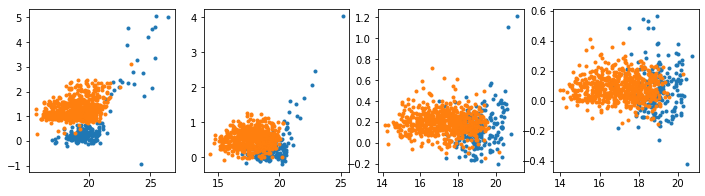

In [44]:
plt.figure(figsize=(12,3))
for i in range(4):
    index = filters[i]+"-"+filters[i+1]
    
    plt.subplot(1,4,i+1)
    plt.plot(QSOs[filters[i]], QSOs[index], ".")
    plt.plot(stars[filters[i]], stars[index], ".")

#### Úkol 6: Vyberte index s nejlépe rozlišenými třídami a vytvořte podmínky pro jejich rozdělení

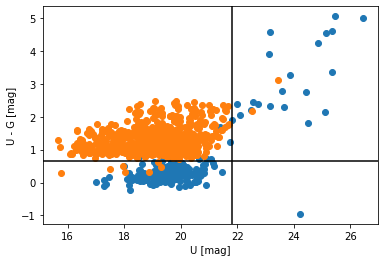

In [45]:
plt.plot(QSOs.u, QSOs["u-g"], "o")
plt.plot(stars.u, stars["u-g"], "o");

plt.axhline(0.65, color="black")
plt.axvline(21.8, color="black")
plt.xlabel("U [mag]")
plt.ylabel("U - G [mag]");

In [46]:
guess = []
for u, g, t in zip(data.u, data.g, data.target):
    if u - g < 0.65 or u > 21.8:
        guess.append("QSO")
    else:
        guess.append("star")

In [47]:
N = len(data.target)
wrong = N - sum((guess == data.target).astype(int))
N, wrong, (1 - wrong / N) * 100

(867, 18, 97.92387543252595)

In [48]:
correct_QSO = sum(((guess == data.target) & (data.target == "QSO")).astype(int))
len(QSOs.u), correct_QSO, correct_QSO / len(QSOs.u) * 100

(212, 203, 95.75471698113208)

Mohli bysme zase přidávat nové podmínky až bysme se dostali ke skoro 100% úspěšnosti

Když se udělá nová přehlídka co bude měřit ještě slabší hvězdy s magnitudou větší než 22, tak se nám ty naše podmínky rázem sesypou a nebudou nám dávat dobrý předpovědi. U takového modelu prostě nemůžeme říct, že by byl dostatečně obecný.

## Vyzkoušíme sílu Machine Learningu

Na začátek je potřeba naše data trochu předělat do formátu, kterému bude náš počítač trochu lépe rozumět. Počítač neví co je to anglické slovo star a zkrakta QSO - mohl by si vytvořit nějakou číselnou reprezentaci těchto stringů, ale proč mu to komplikovat. Použijme prostě 0 pro QSO a 1 pro star.

#### Úkol 7: Vytvořte proměnné `X` a `y`

u,u-g  &rarr;  `X`

`y`:  $\,$QSO &rarr; 0\
&nbsp; &nbsp; &nbsp; &nbsp; star &rarr; 1

In [81]:
X = data[["u", "g"]].copy()
X["u-g"] = X.u - X.g

X = X[["u", "u-g"]]
X

,u,u-g
0,19.240999,1.715000
1,19.732000,1.393000
2,16.120001,0.888000
3,18.995001,0.844002
4,19.032000,0.920000
...,...,...
862,19.247000,0.199999
863,26.433001,5.004000
864,20.535999,0.335999
865,20.627001,0.044001


In [82]:
target = data["target"]

y = []
for t in target:
    if t == "QSO":
        y.append(0)

    elif t == "star":
        y.append(1)
        
y = np.array(y)

In [83]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### Úkol 6: Ze scikit-learn naimportujte `DecisionTreeClassifier` a nafitujte jej

<img src="https://www.researchgate.net/profile/Amir-Akbari-19/publication/348456545/figure/fig1/AS:981743439994883@1611077284634/Schematic-of-a-Decision-Tree-The-figure-shows-an-example-of-a-decision-tree-with-3.png" width=400>

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
clf = DecisionTreeClassifier()

clf.fit(X, y)

DecisionTreeClassifier()

In [87]:
guess = clf.predict(X)

In [94]:
N = len(data.target)
correct = N - sum((guess == data.target).astype(int))
N, correct, correct / N * 100

(867, 867, 100.0)

### Decision surface

In [89]:
size = 100

range_U = np.linspace(min(stars.u), max(QSOs.u), size)
range_UG = np.linspace(min(QSOs["u-g"]), max(QSOs["u-g"]), size)
U, UG = np.meshgrid(range_U, range_UG)

In [90]:
grid = np.vstack((U.flatten(), UG.flatten())).T

In [91]:
predicted = clf.predict(grid)

/home/plsek/anaconda3/envs/test/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [92]:
predicted = predicted.reshape(size,size)

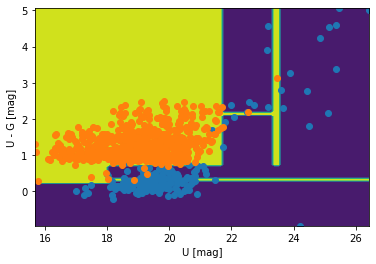

In [93]:
plt.contourf(U, UG, predicted)

plt.plot(QSOs.u, QSOs["u-g"], "o")
plt.plot(stars.u, stars["u-g"], "o");

#plt.axhline(0.65, color="black")
#plt.axvline(21.8, color="black")

plt.xlabel("U [mag]")
plt.ylabel("U - G [mag]");

## Je to dobrý model?

V principu, pokud nebudou mít nějaká hvězda a QSO stejné hodnoty všech 5 parametrů, tak můžete vždycky najít takovou sadu podmínek - jinak řečeno takový model, kterou vám zajístí 100% úspěšnost. 

Takovému jevu, když máte velmi komplexní model a dostanete 100% úspěšnost na tréninkových datech, se v Machine learningu říká overfitování. Je potřeba si však uvědomit, že naším cílem není dokonale rozdělit tuhle "trénovací" sadu dat, u nichž tu "pravdu" už známe. Naším cílem je vytvořit dostatečně obecný model, který bude mít co nejlepší úspěšnost pří použití na data, která jsme ještě nikdy neviděli.

Když pomineme, že by mohli přibýt slabší hvězdy, ale vezmeme v potaz jen, že bychom semtam nějakou hvězdu vynechali při učení a pak to na ní otestovali, tak je velká šance, že z těch dat při tom testování vytáhneme takové pro které ten model nebude moc sedět. A přesně takhle se v Machine Learningu vlastně modely testují. Část dat, které máme si dáme stranou, třeba 10%. Vytrénujeme síť na 90% dat a pak ji na 10% otestujeme. Pojďme si to vyzkoušet.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1024px-Overfitting.svg.png" align=left width=500>

#### Úkol 7: Data zamíchejte a rozdělte v poměru 9:1

hint: knihovna scikit-learn obsahuje funkci `train_test_split`

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, shuffle=True)

In [97]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [98]:
clf = DecisionTreeClassifier() #max_depth=10, max_leaf_nodes=10)

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
clf.score(X_test, y_test)

0.9400921658986175

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

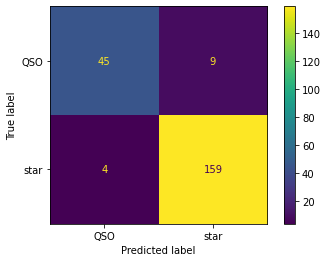

In [112]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["QSO", "star"])

## Vizualizace stromu

In [113]:
from sklearn.tree import plot_tree

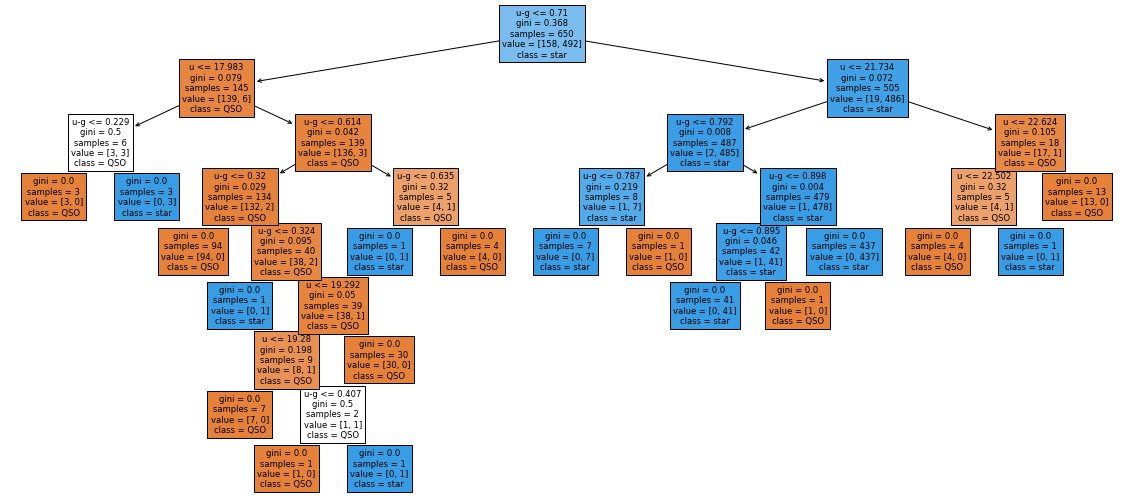

In [114]:
fig, ax = plt.subplots(figsize=(20,9))
plot_tree(clf, 
          feature_names=X.columns,
          class_names=["QSO", "star"],
          filled=True, 
          ax=ax);

In [115]:
from dtreeviz.trees import dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/plsek/anaconda3/envs/test/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


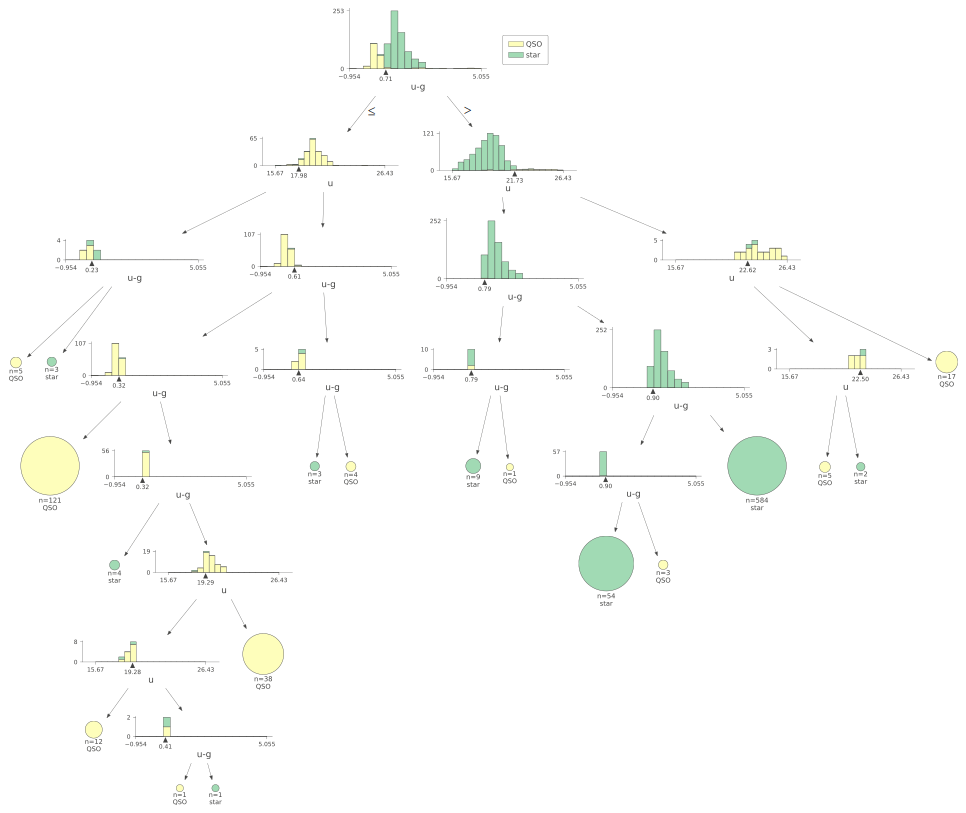

In [116]:
viz = dtreeviz(clf, X, y,
               feature_names=X.columns,
               class_names=["QSO", "star"])

viz

## Random forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [119]:
rf.score(X_test, y_test)

0.9723502304147466

In [120]:
len(rf.estimators_)

10

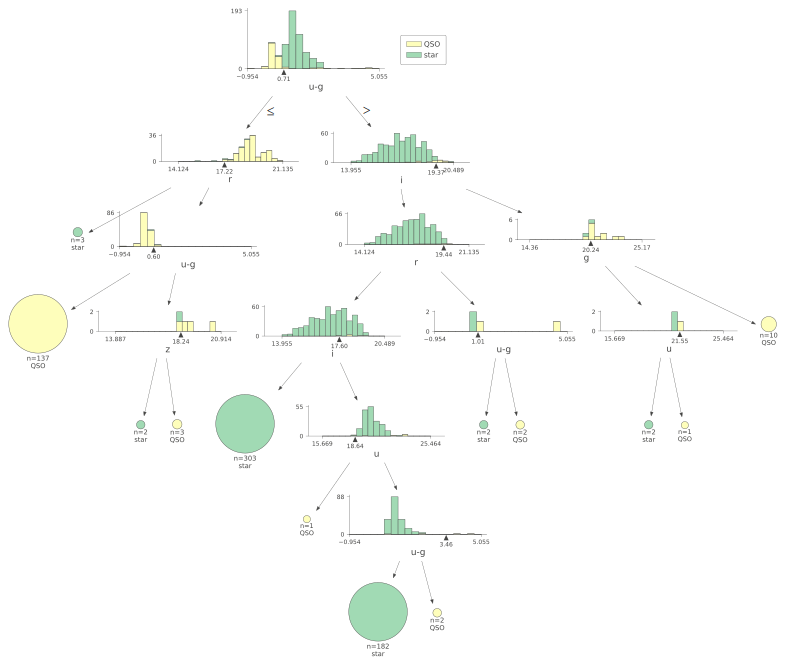

In [52]:
viz = dtreeviz(rf.estimators_[0], X_train, y_train,
               feature_names=X.columns,
               class_names=["QSO", "star"])

viz

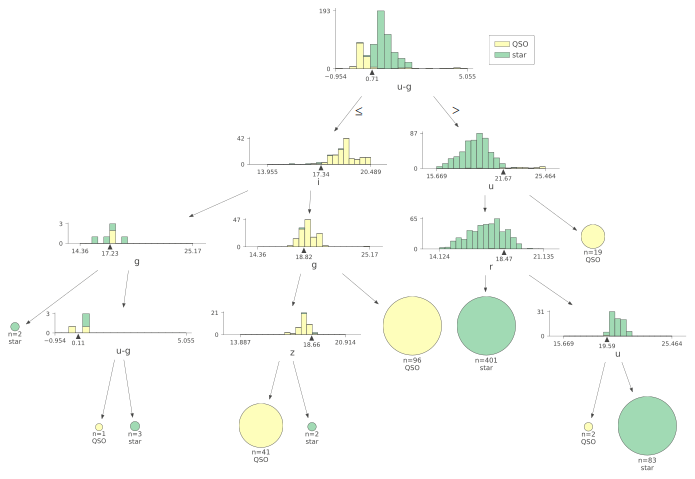

In [53]:
viz = dtreeviz(rf.estimators_[1], X_train, y_train,
               feature_names=X.columns,
               class_names=["QSO", "star"])

viz

## OpenAI